# Geospatial Vector Data

## goals of the lecture
- the vector data and ESRI Shapefile
- the geodataframe in geopandas
- spatial projection

**based on the open data of:**

- [ISTAT](https://www.istat.it/it/archivio/222527) Italian National Institute of Statistic
- [Natural Earth Data](https://www.naturalearthdata.com)

### requirements

- python knowledge
- pandas

### status

*"The Earth isn't flat!!!"*


---

## import modules

In [1]:
import zipfile, io
import pandas as pd
import urllib
import os
from matplotlib import pyplot as plt  #to avoid the warning message by plotting the geometries
import seaborn as sns
import warnings
warnings.simplefilter("ignore") #to avoid warning message

## install geopandas



In [2]:
try:
  import geopandas as gpd
except ModuleNotFoundError as e:
  !pip install geopandas==1.1.0 --break-system-packages
  import geopandas as gpd
if gpd.__version__ != "1.1.0":
  !pip install -U geopandas==1.1.0 --break-system-packages
  import geopandas as gpd

In [3]:
# needed to use the method .explore in geopandas in colab
try:
  import mapclassify
except ModuleNotFoundError as e:
  !pip install mapclassify==2.9.0
  import mapclassify
if mapclassify.__version__ != "2.9.0":
  !pip install mapclassify==2.9.0
  import mapclassify

# Let's start with GeoPandas

## Importing geospatial data

geopandas supports all the vector format offered by the [fiona project](https://github.com/Toblerity/Fiona) or [gdal/ogr](https://www.gdal.org/ogr_formats.html) (more formats and faster)


we will play with the geospatial data offered by [ISTAT](https://istat.it)

### administrative borders
[https://www.istat.it/it/archivio/222527](https://www.istat.it/it/archivio/222527)

Here the zip file with all the different administrative levels of Italy
<br/>
[https://www.istat.it/storage/cartografia/confini_amministrativi/generalizzati/2025/Limiti01012025_g.zip](https://www.istat.it/storage/cartografia/confini_amministrativi/generalizzati/2025/Limiti01012025_g.zip)

Download and investigate the data

In [4]:
if not os.path.exists('Limiti01012025_g'):
    # download the data
    zip_file_url = 'https://www.istat.it/storage/cartografia/confini_amministrativi/generalizzati/2025/Limiti01012025_g.zip'
    zip_file_name = "Limiti01012025_g.zip"
    urllib.request.urlretrieve(zip_file_url ,zip_file_name)
    z = zipfile.ZipFile(zip_file_name)
    # unzip the file
    z.extractall()


Directory listening

In [5]:
os.listdir(".")

['ProvCM01012025_g',
 'Reg01012025_g',
 '01_geospatial_vector_data.ipynb',
 'RipGeo01012025_g',
 '.void',
 'Com01012025_g',
 'Limiti01012025_g.zip']

- RipGeo01012025_g<br/>&nbsp;folder with the macro-regions of Italy
- Reg01012025_g<br/>&nbsp;folder with the regions of Italy
- ProvCM01012025_g<br/>&nbsp;folder with the provinces of Italy
- Com01012025_g<br/>&nbsp;folder with the municipalities of Italy

#### Inspect the the macro regions


In [6]:
#look to the data inside the macro regions
os.chdir('RipGeo01012025_g')

In [7]:
#show only the files
for root, dirs, files in os.walk("."):
    for filename in files:
        print(filename)

RipGeo01012025_g_WGS84.prj
RipGeo01012025_g_WGS84.shx
RipGeo01012025_g_WGS84.shp
macro_regions.geojson
RipGeo01012025_g_WGS84.dbf


### ESRI Shapefile

this is a *ESRI Shapefile* (an old but common used format for the geospatial vector data)

The format is proprietary and some format specifications are public.
A "ESRI Shapefile" is a collection of different files with the same name and different extensions.

The public specifications are for the extensions:

| extension | meaning       | content of the file                                                  |
| --------- | ------------- | -------------------------------------------------------------------- |
| .shp      | shape         | the geometries (point, line, polygon)                                |
| .dbf      | database file | the attributes to associate with the geometries                      |
| .shx      | shape indices | the indices to join the geometries with the attributes               |
| .prj      | projection    | the rule to understand the kind of projection used by the geometries |

To manage the data are _necessary_ 3 files (*.shp, .shx, and .dbf*), however the *.prj* file is crucial to analyze the data togheter with other sources.

It's possibile find other kind of files

more informations are [here](https://www.esri.com/library/whitepapers/pdfs/shapefile.pdf
)



**read the file with gepandas**

In [8]:
# read the file
macroregions=gpd.read_file('RipGeo01012025_g_WGS84.shp')

In [9]:
type(macroregions)

geopandas.geodataframe.GeoDataFrame

### GeoDataframe

geopandas transform everything in a [GeoDataFrame](http://geopandas.org/data_structures.html#geodataframe).

a geodataframe is a pandas [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) with the column "geometry" and special geospatial methods

In [10]:
macroregions

,COD_RIP,DEN_RIP,Shape_Leng,Shape_Area,geometry
0,1,Nord-ovest,2.289040e+06,5.792817e+10,"MULTIPOLYGON (((568231.969 4874857.994, 568233..."
1,2,Nord-est,2.268368e+06,6.239401e+10,"MULTIPOLYGON (((618335.21 4893983.16, 618329.9..."
2,3,Centro,1.978584e+06,5.803709e+10,"MULTIPOLYGON (((876027.96 4525207.198, 876222...."
3,4,Sud,2.502105e+06,7.379461e+10,"MULTIPOLYGON (((1083304.797 4416671.21, 108333..."
4,5,Isole,2.772050e+06,4.993925e+10,"MULTIPOLYGON (((822779.053 3935557.494, 822909..."


Eg.
calculate the area of each geometry

In [11]:
macroregions.geometry.length

0    2.289040e+06
1    2.268368e+06
2    1.978584e+06
3    2.502105e+06
4    2.772050e+06
dtype: float64

**you can plot it**

<Axes: >

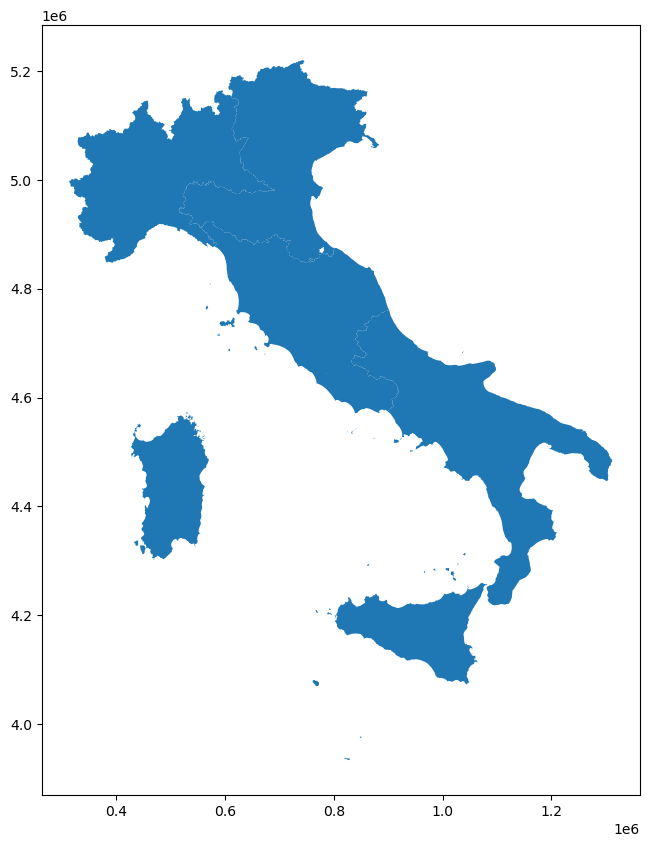

In [12]:
macroregions.plot(figsize=(10,10))

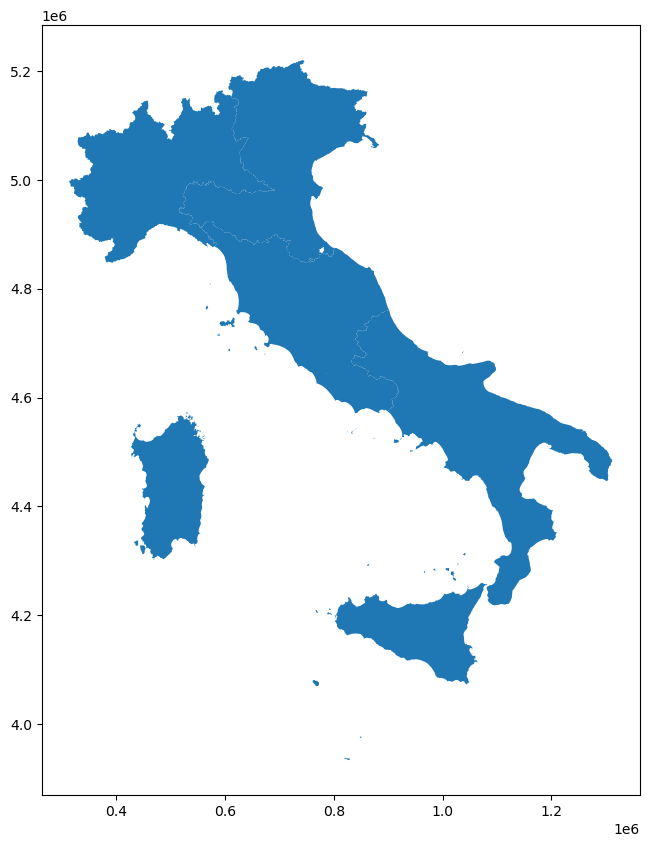

In [13]:
macroregions.plot(figsize=(10,10))
plt.show()

... and new we can use the **classic methods of the pandas DataFrame.**

Eg.

extract a (geo)DataFrame by filter from an attribute

In [14]:
macroregions['DEN_RIP']

0    Nord-ovest
1      Nord-est
2        Centro
3           Sud
4         Isole
Name: DEN_RIP, dtype: object

In [15]:
macroregions.DEN_RIP.unique()

array(['Nord-ovest', 'Nord-est', 'Centro', 'Sud', 'Isole'], dtype=object)

In [16]:
islands = macroregions[macroregions['DEN_RIP'] == 'Isole']

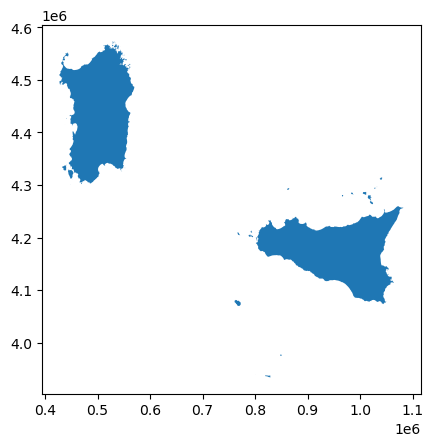

In [17]:
islands.plot()
plt.show()

In [18]:
macroregions.geom_type

0    MultiPolygon
1    MultiPolygon
2    MultiPolygon
3    MultiPolygon
4    MultiPolygon
dtype: object

in an *ESRI shapefile* the kind of geometry *is always the same*, but a *geodataframe* can accept *mixed geometries* for each row.

in our case we have a MultiPolygon
the geometries allowed are:

|geometry|images|
|:--|--:|
|POINT|![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/SFA_Point.svg/51px-SFA_Point.svg.png)|
|LINESTRING|![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/SFA_LineString.svg/51px-SFA_LineString.svg.png)|
|LINEARRING|![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/docs/assets/images/linering.png)|
|POLYGON|![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/SFA_Polygon.svg/51px-SFA_Polygon.svg.png)![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/SFA_Polygon_with_hole.svg/51px-SFA_Polygon_with_hole.svg.png)
|MULTIPOINT|![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/SFA_MultiPoint.svg/51px-SFA_MultiPoint.svg.png)
| MULITLINESTRING|![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/SFA_MultiLineString.svg/51px-SFA_MultiLineString.svg.png)|
| MULTIPOLYGON |![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/SFA_MultiPolygon_with_hole.svg/51px-SFA_MultiPolygon_with_hole.svg.png)|
| GEOMETRYCOLLECTION |![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1d/SFA_GeometryCollection.svg/51px-SFA_GeometryCollection.svg.png) |

note: table based on the wikipedia page [WKT](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry)

#### now we are ready to look how are the geometries

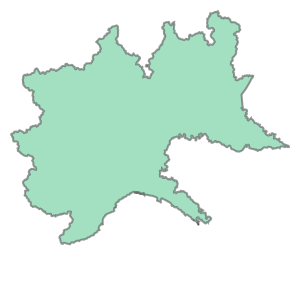

In [19]:
macroregions.geometry[0]

In [20]:
macroregions.DEN_RIP[0]


'Nord-ovest'

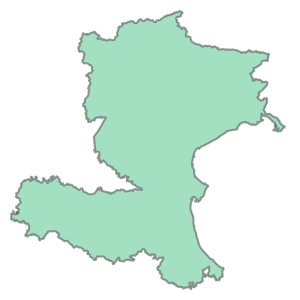

In [21]:
macroregions.geometry[1]

In [22]:
macroregions.DEN_RIP[1]


'Nord-est'

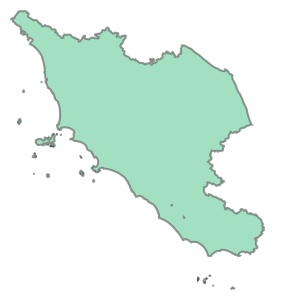

In [23]:
macroregions.geometry[2]

In [24]:
macroregions.DEN_RIP[2]


'Centro'

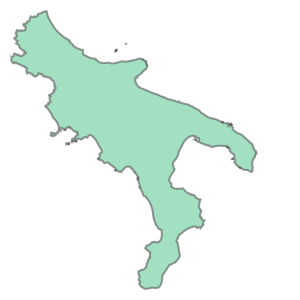

In [25]:
macroregions.geometry[3]

In [26]:
macroregions.DEN_RIP[3]


'Sud'

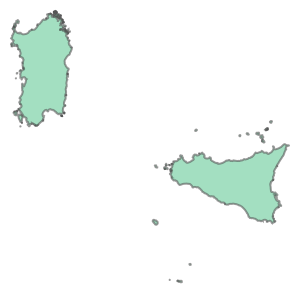

In [27]:
macroregions.geometry[4]

#### Do you want know the centroid position of each geometry?

In [28]:
macroregions.geometry.centroid

0    POINT (478136.136 5011442.788)
1    POINT (702039.161 5039725.527)
2    POINT (756686.712 4757568.884)
3    POINT (1061520.288 4529729.45)
4    POINT (736468.577 4300314.379)
dtype: geometry

the output of the geometries is in [well knowtext format (WKT)](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry)

but ... how are expressed the coordinates??
we have to know the Coordinate Reference System (CRS)

# SPATIAL PROJECTIONS

**CRS** = *Coordinate Reference System*

## The Earth isn't FLAT
### The true size
![](https://raw.githubusercontent.com/napo/geospatial_datascience_unitn_2023/main/images/truesize.gif)

https://thetruesize.com/

## How to convert in latitude/longitude?

In [29]:
macroregions.crs

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## EPSG?
European Petroleum Survey Group  (1986-2005)<br/>
[IOGP](https://www.iogp.org/about-us/) - International Association of Oil & Gas Producers (2005-now)

An important project is the [EPSG registry](http://www.epsg-registry.org/) - the dataset of geodetic parameters

[http://epsg.io/32632](http://epsg.io/32632)

![](https://github.com/napo/geospatial_course_unitn/raw/master/docs/assets/images/epsg32632.png)

![](https://upload.wikimedia.org/wikipedia/commons/b/b9/Usgs_map_traverse_mercator.PNG)

![](https://upload.wikimedia.org/wikipedia/commons/e/ed/Utm-zones.jpg)

In [30]:
macroregions.geometry.centroid.to_crs(epsg=4326)

0     POINT (8.72135 45.25614)
1     POINT (11.58522 45.4818)
2     POINT (12.1454 42.92753)
3    POINT (15.64709 40.72676)
4    POINT (11.72373 38.81989)
dtype: geometry

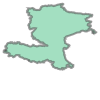

In [31]:
macroregions.to_crs(epsg=4326).geometry[1]

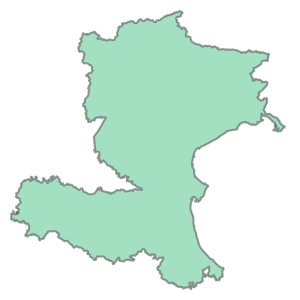

In [32]:
macroregions.geometry[1]

### WGS84 VS ETRS89

|  [WGS84](https://epsg.io/4326)  |  [ETRS89](https://epsg.io/4258) |
|---|---|
|  ![](https://github.com/napo/geospatial_course_unitn/blob/master/images/wgs84_coverage.png?raw=true) | ![](https://github.com/napo/geospatial_course_unitn/blob/master/images/etrs89_coverage.png?raw=true)  

## exploring a .prj file

In [33]:
f=open('RipGeo01012025_g_WGS84.prj','r')

In [34]:
f.read()

'PROJCS["WGS_1984_UTM_Zone_32N",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Meridian",9.0],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0.0],UNIT["Meter",1.0]]'

... like here

[http://epsg.io/32632.wkt](http://epsg.io/32632.wkt)

here a "pretty" version

[http://epsg.io/32632.wkt](http://epsg.io/32632.wkt)

## save the geodataframe


In [35]:
macroregions.to_crs(epsg=4326).to_file('macro_regions.geojson',driver='GeoJSON')

In [36]:
macroregions["lon"] = macroregions.geometry.to_crs(epsg=4326).centroid.x

In [37]:
macroregions["lat"] = macroregions.geometry.to_crs(epsg=4326).centroid.y

In [38]:
macroregions

,COD_RIP,DEN_RIP,Shape_Leng,Shape_Area,geometry,lon,lat
0,1,Nord-ovest,2.289040e+06,5.792817e+10,"MULTIPOLYGON (((568231.969 4874857.994, 568233...",8.729769,45.257521
1,2,Nord-est,2.268368e+06,6.239401e+10,"MULTIPOLYGON (((618335.21 4893983.16, 618329.9...",11.593213,45.490269
2,3,Centro,1.978584e+06,5.803709e+10,"MULTIPOLYGON (((876027.96 4525207.198, 876222....",12.131197,42.932941
3,4,Sud,2.502105e+06,7.379461e+10,"MULTIPOLYGON (((1083304.797 4416671.21, 108333...",15.619795,40.740668
4,5,Isole,2.772050e+06,4.993925e+10,"MULTIPOLYGON (((822779.053 3935557.494, 822909...",11.625945,38.819971


and visualize on [https://geojson.io](https://geojson.io)

![](https://raw.githubusercontent.com/napo/geospatial_datascience_unitn_2023/main/images/geojsonio.jpg)

# Other Examples

## Explore Natural Earth Data
<img src="https://www.naturalearthdata.com/wp-content/uploads/2009/08/NEV-Logo-Black.png" width="450px"/>

[https://www.naturalearthdata.com/](https://www.naturalearthdata.com/)


Check the nice dataset about disputed areas

![](https://raw.githubusercontent.com/napo/geospatial_datascience_unitn_2023/main/images/naturalearth_disputed.jpg)

Start from this [document](https://www.naturalearthdata.com/about/disputed-boundaries-policy/)

Investigate the data

In [39]:
url_naturalearth_data_disputed_areas = "https://github.com/napo/geospatialcourse2025/raw/refs/heads/main/data/ne_10m_admin_0_disputed_areas.zip"
disputed_areas = gpd.read_file(url_naturalearth_data_disputed_areas)

In [40]:
disputed_areas.head(3)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 claim area,0,5,India,IND,0,5,Disputed,None,India,...,Unrecognized,None,None,None,None,None,None,None,None,"POLYGON ((77.80035 35.49541, 77.81533 35.47334..."
1,Admin-0 claim area,0,5,China,CH1,1,5,Disputed,None,China,...,Unrecognized,None,None,None,None,None,None,None,None,"POLYGON ((77.80035 35.49541, 77.82949 35.49179..."
2,Admin-0 breakaway and disputed,0,4,Israel,IS1,1,5,Disputed,None,Israel,...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((34.24835 31.21145, 34.2644 31.22419,..."


In [41]:
admins = disputed_areas.ADMIN.value_counts()
admins = admins.sort_values(ascending=False)
admins

ADMIN
India                                   8
Spain                                   7
Israel                                  7
French Southern and Antarctic Lands     5
South Korea                             3
China                                   3
Croatia                                 3
Georgia                                 2
Pakistan                                2
Egypt                                   2
British Indian Ocean Territory          2
Guyana                                  2
Belize                                  2
South Georgia and the Islands           2
Palestine                               2
France                                  2
Russia                                  2
Ukraine                                 2
United States Minor Outlying Islands    2
Bhutan                                  2
Somaliland                              1
North Korea                             1
Morocco                                 1
Western Sahara              

plot it

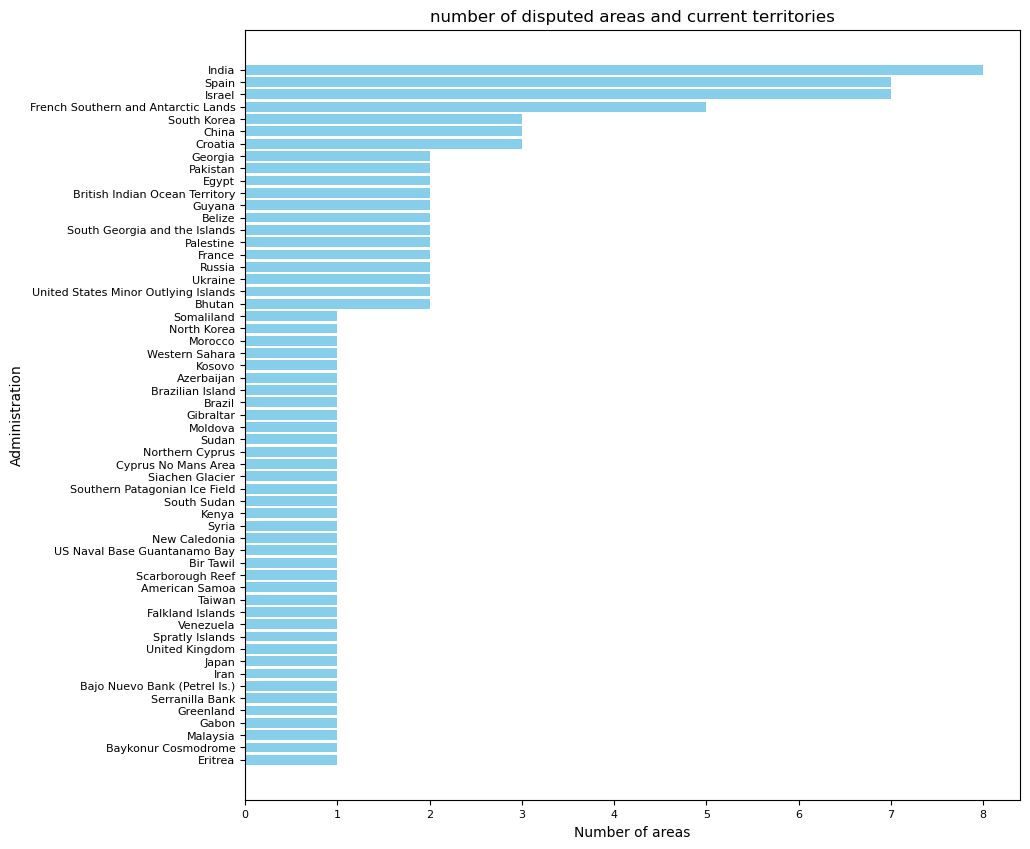

In [42]:
plt.figure(figsize=(10, 10))
plt.barh(admins.index, admins.values, color='skyblue')
plt.xlabel('Number of areas')
plt.ylabel('Administration')
plt.title('number of disputed areas and current territories')
plt.gca().invert_yaxis()
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [43]:
disputed_areas.explore(tooltip="NAME")

In [45]:
url_naturalearth_data_disputed_bordes = "https://github.com/napo/geospatialcourse2025/raw/main/data/ne_10m_admin_0_disputed_areas.zip"
disputed_borders = gpd.read_file(url_naturalearth_data_disputed_bordes)

In [46]:
disputed_borders.head(3)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 claim area,0,5,India,IND,0,5,Disputed,None,India,...,Unrecognized,None,None,None,None,None,None,None,None,"POLYGON ((77.80035 35.49541, 77.81533 35.47334..."
1,Admin-0 claim area,0,5,China,CH1,1,5,Disputed,None,China,...,Unrecognized,None,None,None,None,None,None,None,None,"POLYGON ((77.80035 35.49541, 77.82949 35.49179..."
2,Admin-0 breakaway and disputed,0,4,Israel,IS1,1,5,Disputed,None,Israel,...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((34.24835 31.21145, 34.2644 31.22419,..."


In [47]:
longest = disputed_borders.to_crs(epsg=3857).geometry.length.max()
shortest = disputed_borders.to_crs(epsg=3857).geometry.length.min()

In [48]:
longest_border_disputed = disputed_borders[disputed_borders.to_crs(epsg=3857).geometry.length == longest]
longest_border_disputed

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
71,Admin-0 claim area,5,5,United Kingdom,GB1,1,2,Disputed,1,Falkland Islands,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-59.69445 -52.2081, -59.67687 ..."


In [49]:
shortest_border_disputed = disputed_borders[disputed_borders.to_crs(epsg=3857).geometry.length == shortest]
shortest_border_disputed

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
93,Admin-0 claim area,6,9,Spain,ESP,0,5,Disputed,None,Spain,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-3.90296 35.21531, -3.90233 35..."


In [50]:
longest_border_disputed

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
71,Admin-0 claim area,5,5,United Kingdom,GB1,1,2,Disputed,1,Falkland Islands,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-59.69445 -52.2081, -59.67687 ..."


In [51]:
longest_border_disputed.explore(tooltip=['NAME','ADMIN','SOVEREIGNT','TYPE'])

In [52]:
shortest_border_disputed.explore(tooltip=['NAME','ADMIN','SOVEREIGNT','TYPE'])

## Exercise
1. load the shapefile of ISTAT with the information of the provinces
    - filter it for an italian provice at your choice (eg. Trento)
    - plot it
2. load the shapefile of ISTAT with the informations of the muncipalities
    - identify the cities of the province selected with the biggest and smallest area
    - extract all the centroids of the areas expressed in WGS84
    - select all the muncipalities of the Province of Trento
    - extract a representative point for the area of each municipality converted in WGS84
    - suggestion: .representative_point()
    - save the points in a GeoJSON file
    - calculate the distance on the geodentic between the municipality with the big area and smallest area by using the centroid
3.  download the shapefile of the [lakes and bodies of water of Trentino](https://github.com/napo/geospatialcourse2025/raw/refs/heads/main/data/lakes_bodies_of_water_trentino.zip) - projection Monte Mario zone 1
    - convert in WGS84 and create a geojson

